Size: 100, d=4, k=10, Time: 0.0000 ms
Size: 10100, d=4, k=10, Time: 37.9965 ms
Size: 20100, d=4, k=10, Time: 28.0981 ms
Size: 30100, d=4, k=10, Time: 28.0008 ms
Size: 40100, d=4, k=10, Time: 37.0965 ms
Size: 50100, d=4, k=10, Time: 48.9991 ms
Size: 60100, d=4, k=10, Time: 61.0042 ms
Size: 70100, d=4, k=10, Time: 70.9999 ms
Size: 80100, d=4, k=10, Time: 92.0177 ms
Size: 90100, d=4, k=10, Time: 93.0035 ms


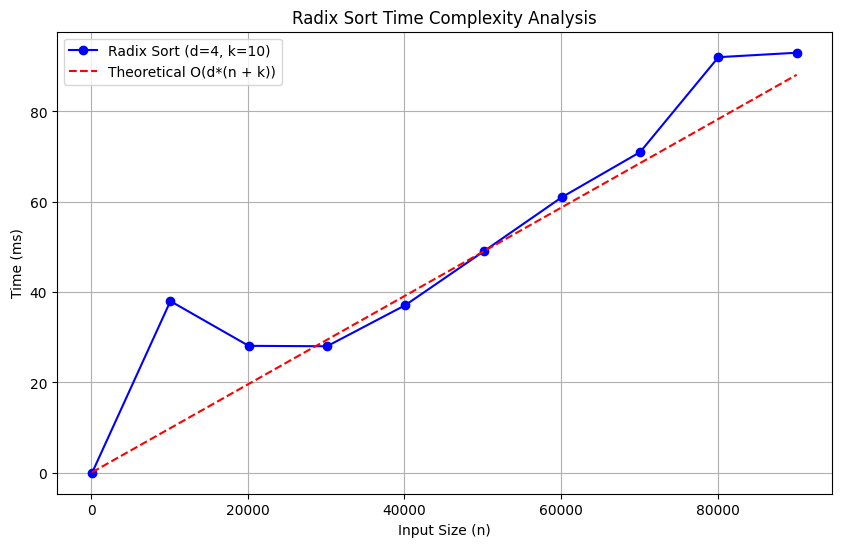

In [2]:
import matplotlib.pyplot as plt
import random
import time
import math


# Python program for implementation of Radix Sort
# A function to do counting sort of arr[] according to
# the digit represented by exp.
def countingSort(arr, exp1):

    n = len(arr)

    # The output array elements that will have sorted arr
    output = [0] * (n)

    # initialize count array as 0
    count = [0] * (10)

    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

# Method to do Radix Sort


def radixSort(arr):

    # Find the maximum number to know number of digits
    max1 = max(arr)

    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1 / exp >= 1:
        countingSort(arr, exp)
        exp *= 10


# Input sizes to test
input_sizes = list(range(100, 100001, 10000))  # From 100 to 100,000
execution_times = []

# Fixed parameters
k = 10  # Base (digits 0-9)
max_num = 9999  # 4-digit numbers (fixed d=4)

for size in input_sizes:
    arr = [random.randint(0, max_num) for _ in range(size)]
    
    start_time = time.time()
    radixSort(arr.copy())
    end_time = time.time()
    
    elapsed_time = (end_time - start_time) * 1000  # ms
    execution_times.append(elapsed_time)
    print(f"Size: {size}, d=4, k=10, Time: {elapsed_time:.4f} ms")

# Theoretical O(d*(n + k)) scaling
d = 4  # Fixed number of digits
median_idx = len(input_sizes) // 2
median_n = input_sizes[median_idx]
median_time = execution_times[median_idx]
scaling_factor = median_time / (d * (median_n + k))

theoretical_times = [scaling_factor * d * (n + k) for n in input_sizes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, execution_times, 'b-o', label='Radix Sort (d=4, k=10)')
plt.plot(input_sizes, theoretical_times, 'r--', label='Theoretical O(d*(n + k))')
plt.title("Radix Sort Time Complexity Analysis")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)
plt.show()